In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Read the data

In [30]:
tseries = pd.read_json('../calculations//pois_3min')

In [60]:
ewave = pd.read_csv('../easywave/eWave.poi.ssh',delim_whitespace=True)

# 2D plots

Parse data

In [61]:
x0 = 90
x1 = 290
y0 = -70
y1 = 70
ny,nx = (2100, 3000) # 4min resolution
# ny, nx = 2800, 4000 # 3min resolution
# ny, nx = 4200, 6000# 2min resolution

In [15]:
# bathymetry = np.fromfile('../data/bathymetry',dtype='float64')[2:].reshape((ny,nx))
bathymetry = np.fromfile('../data/bathymetry',dtype='float64')[2:].reshape((ny,nx))

In [17]:
hmax = np.loadtxt('../calculations/tlab2D_4min_hmax', delimiter=',', skiprows=1)

In [18]:
hmax = hmax.reshape((ny,nx))

In [19]:
arrivals = np.loadtxt('../calculations/tlab2D_4min_arr',delimiter=',',skiprows=1).reshape((ny,nx))

In [20]:
x = np.linspace(x0,x1, bathymetry.shape[1])
y = np.linspace(y0,y1, bathymetry.shape[0])
# x, y = np.meshgrid(x, y)

The big plot

[12.  8.]


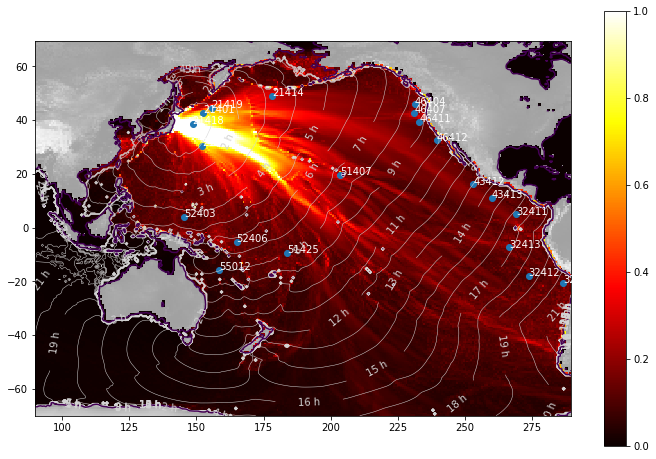

In [21]:
skip = 10
plt.pcolormesh(x[::skip],y[::skip],bathymetry[::skip,::skip],cmap = plt.cm.gray_r)
plt.pcolormesh(x[::skip],y[::skip],
               np.ma.masked_array(hmax[::skip,::skip], bathymetry[::skip,::skip]<0), 
               vmax=1, vmin=0.0, cmap = plt.cm.hot)
plt.colorbar()

c = plt.contour(x[::skip],y[::skip],arrivals[::skip,::skip]/60/60, np.arange(0,24,1), linewidths=0.5, colors='lightgrey')
plt.clabel(c,fmt='%i h')


plt.contour(x[::skip],y[::skip],bathymetry[::skip,::skip],[0.0])

points = np.array([tseries[column]['location'] for column in tseries.columns])
plt.scatter(points[:,0],points[:,1])
    
for column in tseries.columns:
    plt.text(tseries[column]['location'][0],tseries[column]['location'][1],column,color='white')
plt.gca().set_aspect(1)
plt.gcf().set_size_inches(12,8)
print(plt.gcf().get_size_inches())

# Time series plots

In [22]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]

In [23]:
darts = {}
for dart in DARTs:
    darts[dart] = np.loadtxt('../data/tsunamiDART{}'.format(dart))

In [24]:
import pandas as pd

21414
21419
21401
21418
21413


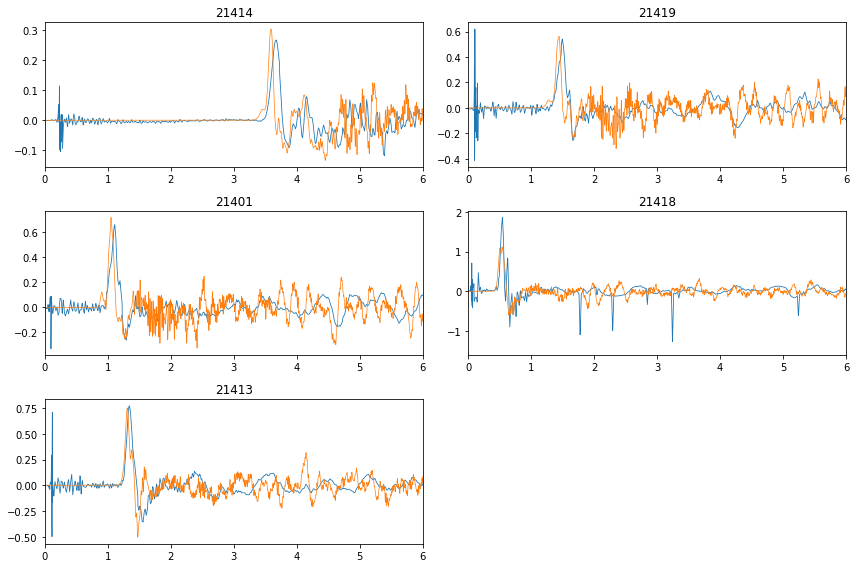

In [62]:
plt.figure(figsize=(12,8))
for i,dart in enumerate([21414,21419,21401,21418, 21413]):
    print(dart)
    plt.subplot(3,2,i+1)
    plt.plot(darts[dart][:,0]*24,darts[dart][:,1], '-', lw=0.8,ms=0.25,label='measurement')
    plt.plot(np.array(tseries[dart]['time'])/60/60, tseries[dart]['surface'],'-',lw=0.7,ms=0.25,label='nami')    
    plt.title('{}'.format(dart))

    plt.xlim(0,6)
# plt.legend(loc=0)
plt.tight_layout()

52403
52406
55012
51407
51425


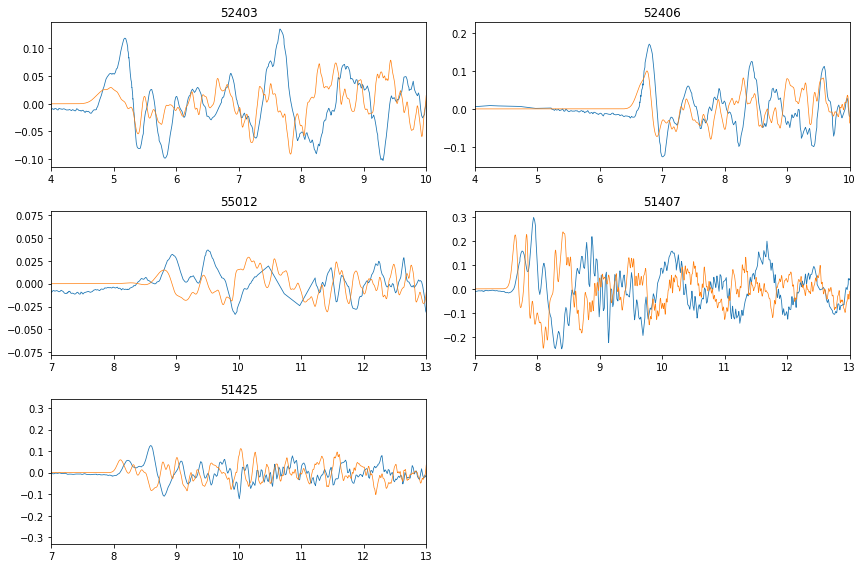

In [26]:
rangos = {
    52403: [4,10],
    52406: [4,10],
    55012: [7,13],
    51407: [7,13],
    51425: [7,13]
}
plt.figure(figsize=(12,8))
for i,dart in enumerate([52403, 52406, 55012, 51407, 51425]):
    print(dart)
    plt.subplot(3,2,i+1)
    plt.plot(darts[dart][:,0]*24,darts[dart][:,1], '-', lw=0.8,ms=0.25,label='measurement')
    plt.plot(np.array(tseries[dart]['time'])/60/60, tseries[dart]['surface'],'-',lw=0.7,ms=0.25,label='nami')    
    plt.title('{}'.format(dart))

    plt.xlim(rangos[dart][0], rangos[dart][1])
# plt.legend(loc=0)
plt.tight_layout()

46404
46407
46411
46412
43412
43413


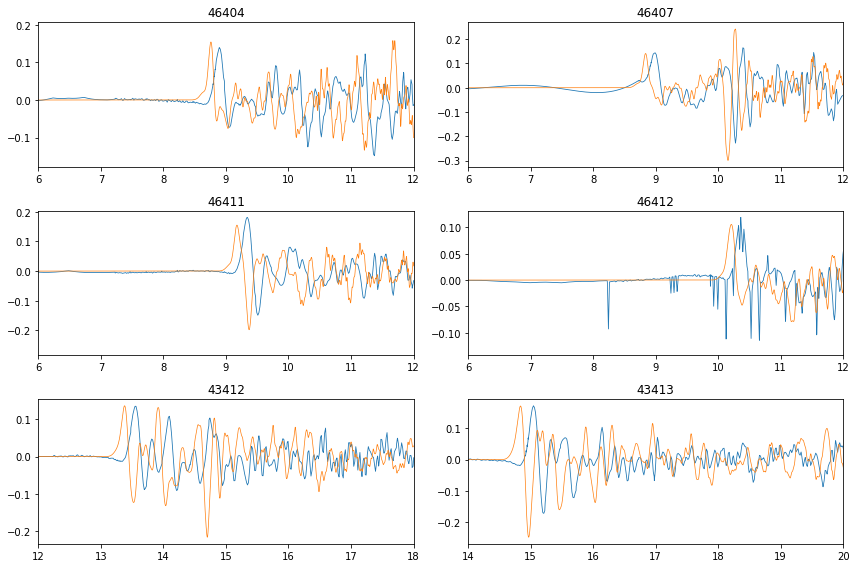

In [27]:
rangos = {
    46404: [6,12],
    46407: [6,12],
    46411: [6,12],
    46412: [6, 12],
    43412: [12, 18],
    43413: [14, 20]
}

plt.figure(figsize=(12,8))
for i,dart in enumerate([46404,46407,46411,46412,43412,43413]):
    print(dart)
    plt.subplot(3,2,i+1)
    plt.plot(darts[dart][:,0]*24,darts[dart][:,1], '-', lw=0.8,ms=0.25,label='measurement')
    plt.plot(np.array(tseries[dart]['time'])/60/60, tseries[dart]['surface'],'-',lw=0.7,ms=0.25,label='nami')    
    plt.title('{}'.format(dart))

    plt.xlim(rangos[dart][0], rangos[dart][1])

# plt.legend(loc=0)
plt.tight_layout()

32411
32412
32413
32401


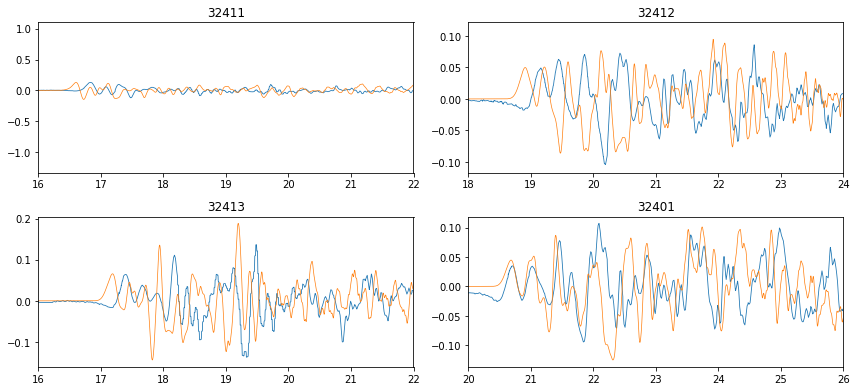

In [28]:
rangos = {
    32411: [16,22],
    32412: [18,24],
    32413: [16,22],
    32401: [20,26],
}
plt.figure(figsize=(12,8))
for i,dart in enumerate([32411,32412,32413,32401]):
    print(dart)
    plt.subplot(3,2,i+1)
    plt.plot(darts[dart][:,0]*24,darts[dart][:,1], '-', lw=0.8,ms=0.25,label='measurement')
    plt.plot(np.array(tseries[dart]['time'])/60/60, tseries[dart]['surface'],'-',lw=0.7,ms=0.25,label='nami')    
    plt.title('{}'.format(dart))

    plt.xlim(rangos[dart][0], rangos[dart][1])

#     plt.xlim(12,24)
# plt.legend(loc=0)
plt.tight_layout()